# Поиск закономерностей, определяющих успех продукта стриминговой игровой компании.

## Введение

Заказчик - интернет-магазин, осуществляющий продажи компьютерных игр по всему миру.  
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).   
Для отдела аналитики поставлена задача выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. В наличии данные до 2016 года. Магазин планирует кампанию на 2017-й. Необходимо отработать принцип работы с данными. Неважно, осуществляется ли продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

# Цель проекта  
Выявить закономерности, определяющие успех продукта.

# Описание данных  
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

# План работы  
1. Введение
2. Подготовка данных для анализа
3. Исследовательский анализ данных (EDA)
   1. Динамика производства игр за весь исследуемый период
   2. Продажи игр на различных платформах
4. Особенности рынка в регионах
5. Проверка гипотез
6. Общий вывод

## Подготовка данных для анализа

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
from plotly.subplots import make_subplots

In [2]:
games = pd.read_csv('/home/daniil/Documents/datasets/striming/games.csv')

In [3]:
# замена пробелов в именах столбцов и перевод в нижний регистр
games.columns = [x.lower().replace(' ','_') for x in games.columns.values]  

print('\n\033[2;30;47m Общая свсодка : \033[0;0m') # вывод общей сводки о датасете
display(games.info())
print('\n\033[2;30;47m Вывод первых строк : \033[0;0m')
display(games.head(3))
print('\033[2;30;47m Подсчет доли пропусков в % : \033[0;0m')
display(round(games.isnull().mean() * 100, 2))
print('\033[2;30;47m Подсчет дубликатов :\033[0;0m')
display(round(games.duplicated().mean() * 100, 2))    # проверка явных дубликатов
print('\n\033[2;30;47m Сводка числовых значений, включая даты: \033[0;0m')
display(games.describe(datetime_is_numeric=True).T)
print('\n\033[2;30;47m Общая сводка строковых значений: \033[0;0m')
try:
        display(games.describe(include=['object']).T)
except:
        display('Набор не содержит строковых значений')
print ('\n\033[01;30;47m_____________ОКОНЧАНИЕ ОТЧЕТА_____________\033[0;0m\n\n')


 Общая свсодка : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None


 Вывод первых строк : 


name platform  year_of_release     genre  na_sales  eu_sales  \
0         Wii Sports      Wii           2006.0    Sports     41.36     28.96   
1  Super Mario Bros.      NES           1985.0  Platform     29.08      3.58   
2     Mario Kart Wii      Wii           2008.0    Racing     15.68     12.76   

   jp_sales  other_sales  critic_score user_score rating  
0      3.77         8.45          76.0          8      E  
1      6.81         0.77           NaN        NaN    NaN  
2      3.79         3.29          82.0        8.3      E

 Подсчет доли пропусков в % : 


name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         40.09
rating             40.48
dtype: float64

 Подсчет дубликатов :


0.0


 Сводка числовых значений, включая даты: 


count         mean        std     min     25%      50%  \
year_of_release  16446.0  2006.484616   5.877050  1980.0  2003.0  2007.00   
na_sales         16715.0     0.263377   0.813604     0.0     0.0     0.08   
eu_sales         16715.0     0.145060   0.503339     0.0     0.0     0.02   
jp_sales         16715.0     0.077617   0.308853     0.0     0.0     0.00   
other_sales      16715.0     0.047342   0.186731     0.0     0.0     0.01   
critic_score      8137.0    68.967679  13.938165    13.0    60.0    71.00   

                     75%      max  
year_of_release  2010.00  2016.00  
na_sales            0.24    41.36  
eu_sales            0.11    28.96  
jp_sales            0.04    10.22  
other_sales         0.03    10.57  
critic_score       79.00    98.00


 Общая сводка строковых значений: 


count unique                          top  freq
name        16713  11559  Need for Speed: Most Wanted    12
platform    16715     31                          PS2  2161
genre       16713     12                       Action  3369
user_score  10014     96                          tbd  2424
rating       9949      8                            E  3990


_____________ОКОНЧАНИЕ ОТЧЕТА_____________




In [4]:
# перевод данных о годе выхода к формату даты
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y', errors='coerce')

In [5]:
games = games.dropna(subset = ['name','year_of_release'])
games['sum_sales'] = games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']
games['rating'] = games['rating'].fillna('no_data')
games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'] = games['user_score'].astype(float) 

games = games.query('name !="Strongest Tokyo University Shogi DS"')

display(games.info())

display(round(games.isnull().mean() * 100, 2))
display(games['rating'].unique())

display(f'Уникальных наименований игр : {games["name"].nunique()}')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16443 non-null  object        
 1   platform         16443 non-null  object        
 2   year_of_release  16443 non-null  datetime64[ns]
 3   genre            16443 non-null  object        
 4   na_sales         16443 non-null  float64       
 5   eu_sales         16443 non-null  float64       
 6   jp_sales         16443 non-null  float64       
 7   other_sales      16443 non-null  float64       
 8   critic_score     7983 non-null   float64       
 9   user_score       7463 non-null   float64       
 10  rating           16443 non-null  object        
 11  sum_sales        16443 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 1.6+ MB


None

name                0.00
platform            0.00
year_of_release     0.00
genre               0.00
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.45
user_score         54.61
rating              0.00
sum_sales           0.00
dtype: float64

array(['E', 'no_data', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

'Уникальных наименований игр : 11425'

***Вывод***  
По результатам подготовки данных для анализа, установлено, что датасет содержит информацию о 16443 наблюдениях по 11 параметрам;
- установлено 11425 уникальных наименований игр, выпущенных за период с 1980 по 2016 год;
- игры распределены по 12 жанрам и 31 игровым платформам;
- страны Северной Америки почти вдвое опережают Европу по среднему показателю продаж - 26,3 и 14,5 млн соответственно, в свою очередь Европа почти вдвое опережает Японию, в которой средний уровень продаж 7, млн
- полных дубликатов не обнаружено;
- выявлены пропущенные значения в параметрах: наименование - 0.01%, год выпуска - 1,61%, жанр - 0.01%, оценка критиков - 51,32%, оценка пользователей - 40,09%, рейтинг ESRB - 40,48%; принято решение об удалении записей с пропущенными значениями в полях названия игры и года ее выхода, решение об использовании данных с иными пропущенными значениями, их коррекции или исключении из анализа будет принято ниже; 
- среди параметров представленных наблюдений установлены следующие типы данных: оценка критиков, оценка пользователей, рейтинг ESRB являются категорильными переменными и представлены в формате строки или числа; год релиза - был приведет к формату даты; название игры, платформы и жанра имеют формат строк; данные о продажах записаны в числовом формате;
- определены суммарные продажи игр по всем регионам;
- удалена некорректная запись об игре "Strongest Tokyo University Shogi DS";
- в поле "Оценка пользователей" значение "tbd" заменены на пропуски, оценки пользователей приведены к формату float;
- в поле "ESRB рейтинг" пропущенные значеня заменены на "no_data";

## Исследовательский анализ данных (EDA)


### Динамика производства игр за весь исследуемый период

In [6]:
# определяем абсолютное и относительное количество выпускаемых игр ежегодно,
# а также их абсолютное и относительное кумулятивное количество
games_by_year = games.groupby('year_of_release', as_index=False)['name'].count().rename(columns={'name': 'abs_count'})
games_by_year['%_count'] = (games_by_year['abs_count']/games_by_year['abs_count'].sum()*100).round(2)

games_by_year['abs_cumulative_count'] = games_by_year['abs_count'].cumsum()
games_by_year['%_cumulative_count'] = (games_by_year['abs_cumulative_count'] / 
                                       games_by_year['abs_count'].sum() *100).round(2)

display(games_by_year.head(3))

year_of_release  abs_count  %_count  abs_cumulative_count  \
0      1980-01-01          9     0.05                     9   
1      1981-01-01         46     0.28                    55   
2      1982-01-01         36     0.22                    91   

   %_cumulative_count  
0                0.05  
1                0.33  
2                0.55

No handles with labels found to put in legend.


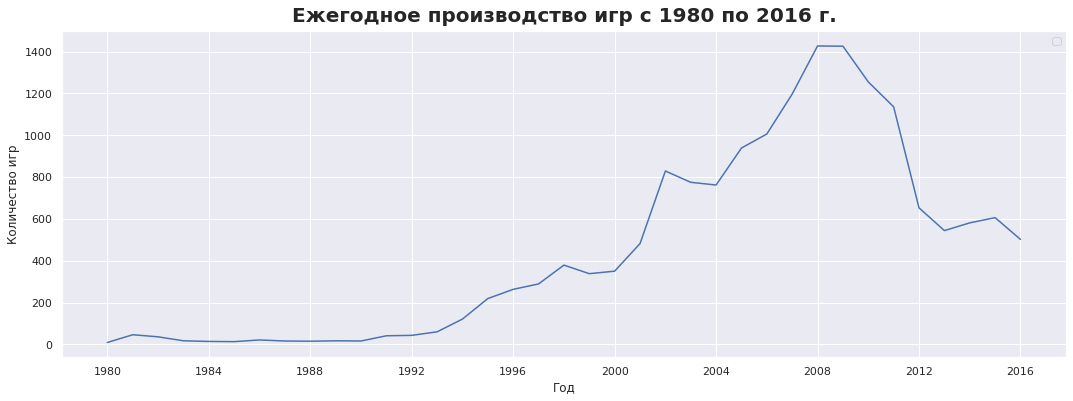

'Выпуск игр в 2018 году :'

[1427]

'Выпуск игр в 2016 году :'

[502]

In [7]:
# график изменения абсолютного количества игр за весь исследуемый период
plt.figure(figsize=(18, 6))
sns.set_theme(style='darkgrid')
sns.lineplot(data=games_by_year, x="year_of_release", y="abs_count")
plt.legend() 
plt.title('Ежегодное производство игр с 1980 по 2016 г.',fontweight ="bold", fontsize='20', y=1.01)
plt.ylabel("Количество игр")
plt.xlabel("Год")
plt.xticks(rotation=0)
plt.show()

display('Выпуск игр в 2018 году :')
display(games_by_year.query('year_of_release == "2008-01-01"')['abs_count'].tolist())
display('Выпуск игр в 2016 году :')
display(games_by_year.query('year_of_release == "2016-01-01"')['abs_count'].tolist())

No handles with labels found to put in legend.


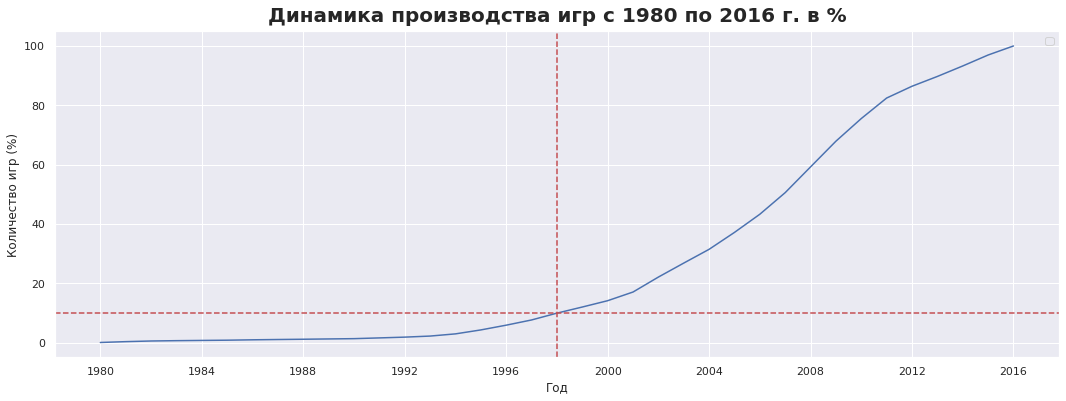

'Всего произведено игр с 1980 по 2016 : 16443'

In [8]:
# график изменения кумулятивного количества выпущенных игр за весь исследуемый период
plt.figure(figsize=(18, 6))
sns.set_theme(style='darkgrid')
sns.lineplot(data=games_by_year, x="year_of_release", y="%_cumulative_count")
plt.legend() 
plt.title('Динамика производства игр с 1980 по 2016 г. в %',fontweight ="bold", fontsize='20', y=1.01)
plt.ylabel("Количество игр (%)")
plt.xlabel("Год")
plt.axhline(y=10, color='r', linestyle='--')
plt.axvline(pd.Timestamp('1998-01-01'), color='r', linestyle='--')
plt.xticks(rotation=0)
plt.show()

display(f'Всего произведено игр с 1980 по 2016 : {games_by_year["abs_cumulative_count"].max()}')

***Вывод***  
Ежегодное производство видео-игр увеличивалось с 1980 года и достигло пика к 2008 году, когда было выпущено более 1400 игр. В дальнейшем производство снижалось до 2016 года, за который на рынок вышло только 502 игры, что соответствует уровню 2002 года. Всего с 1980 по 2016 год было выпущено 16444 игры, из которых 90% созданы позднее 1998 года.

### Продажи игр на различных платформах

In [9]:
# аггрегируем даты старта и окончания продаж игр на различных платформах, а также суммы проданых копий по регионам
console_life = games.groupby('platform',as_index=False
                            ).agg({'year_of_release':[np.min,np.max],
                                   'na_sales':sum, 
                                   'eu_sales':sum, 
                                   'jp_sales':sum, 
                                   'other_sales':sum}) 

# избавимся от мультииндекса в именах колонок
console_life.columns = list(map(''.join, console_life.columns.values))
console_life = console_life.rename(columns={'year_of_releaseamin':'start',
                                           'year_of_releaseamax':'end',
                                           'na_salessum':'sum_na',
                                           'eu_salessum':'sum_eu',
                                           'jp_salessum':'sum_jp',
                                           'other_salessum':'sum_other'})

# вычисление срока "жизни" игровой платформы
console_life['diff'] = ((console_life['end'] - console_life['start'])/ np.timedelta64(1, 'Y')).round(1)

# общее кол-во проданных копий игр по платформам
console_life['total'] = console_life['sum_na']+console_life['sum_eu']+console_life['sum_other']+console_life['sum_jp']

display(console_life.head(3))

platform      start        end  sum_na  sum_eu  sum_jp  sum_other  diff  \
0     2600 1980-01-01 1989-01-01   80.78    4.86    0.00       0.84   9.0   
1      3DO 1994-01-01 1995-01-01    0.00    0.00    0.10       0.00   1.0   
2      3DS 2011-01-01 2016-01-01   82.65   61.27  100.62      13.27   5.0   

    total  
0   86.48  
1    0.10  
2  257.81

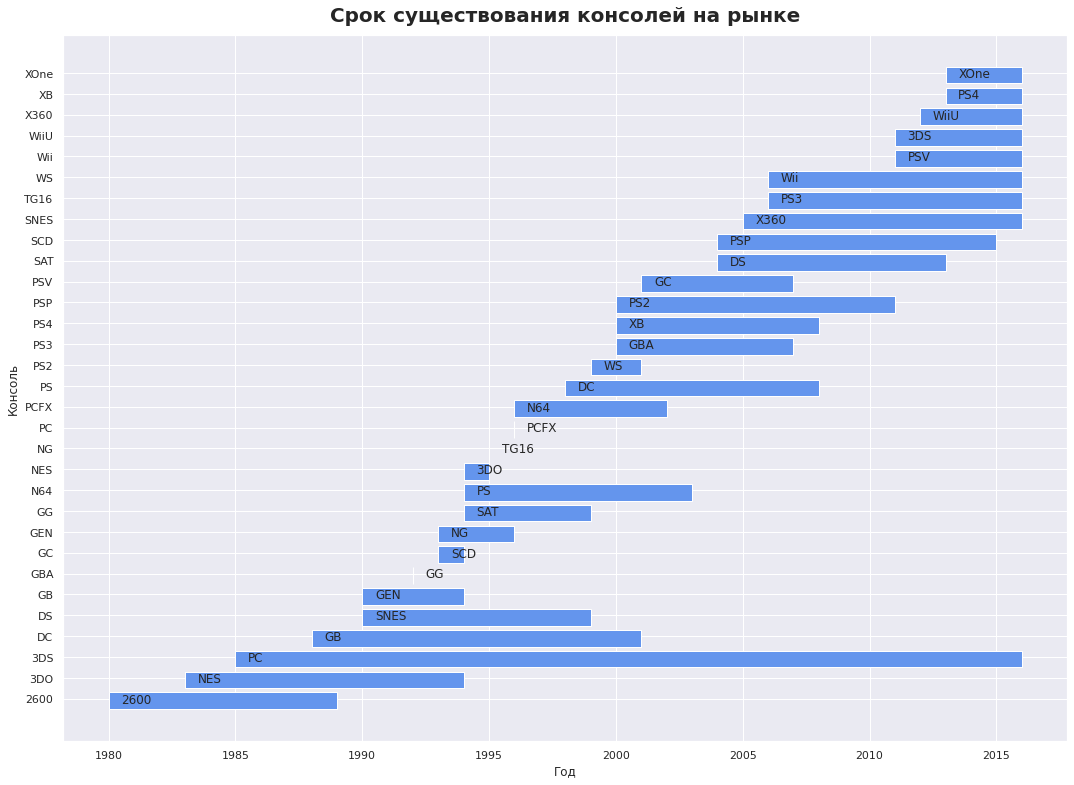

'Количество ункальных консолей : 31'

In [10]:
# график срока "жизни" игровой платформы на рынке за исследуемый период на временной шкале

fig, gnt = plt.subplots(figsize=(18,13))
  
y_tick_labels = console_life.platform.values
y_pos = np.arange(len(y_tick_labels))
 
gnt.set_yticks(y_pos)
gnt.set_yticklabels(y_tick_labels)
 
for index, row in console_life.sort_values(by='start').reset_index().iterrows():
    start_year = int(row.start.strftime("%Y"))
    duration = row['diff']#.days/365
    gnt.broken_barh([(start_year, duration)], 
                    (index-0.5,0.8), 
                    facecolors =('cornflowerblue'),
                   label=row.platform)
    gnt.text(start_year+0.5, index-0.2, row.platform)
gnt.set_title("Срок существования консолей на рынке",fontweight ="bold", fontsize='20', y=1.01)
gnt.set_xlabel("Год")
gnt.set_ylabel("Консоль")
plt.show()

display(f'Количество ункальных консолей : {console_life["platform"].nunique()}')


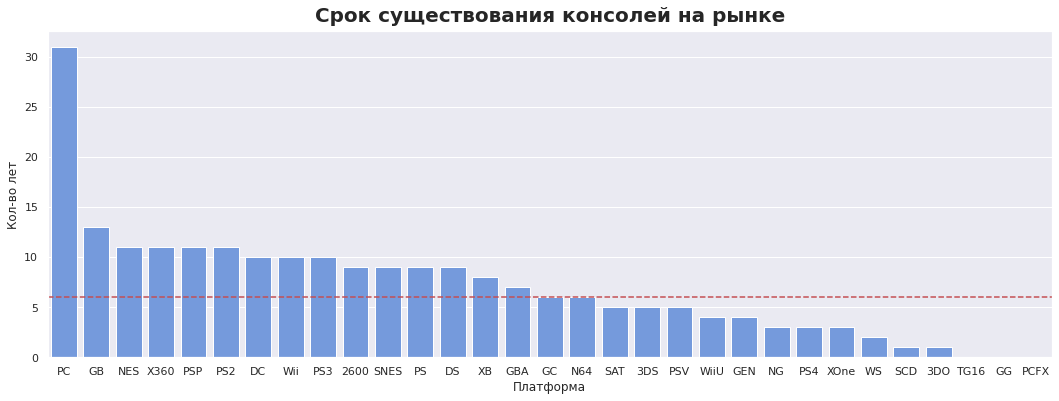

In [11]:
# График срока "жизни" платформы на рынке в порядке убывания срока
console_life = console_life.sort_values(by='diff', ascending=False)
plt.figure(figsize=[18,6])
sns.barplot(data=console_life, x='platform', y='diff', color = 'cornflowerblue')
plt.axhline(y=console_life['diff'].median(), color='r', linestyle='--')
plt.title("Срок существования консолей на рынке",fontweight ="bold", fontsize='20', y=1.01)
plt.ylabel("Кол-во лет")
plt.xlabel("Платформа")
plt.show()

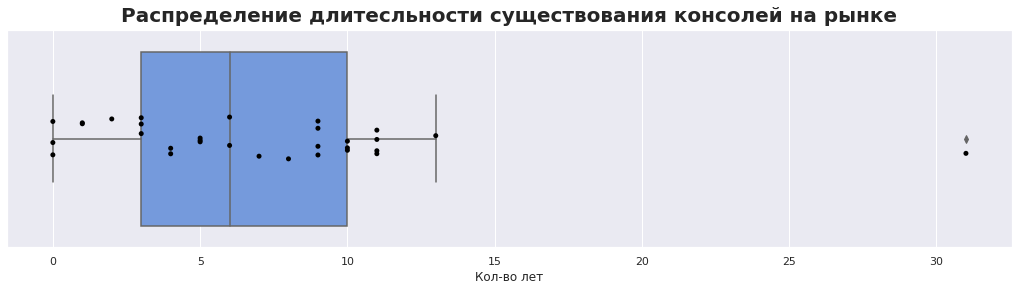

count    31.000000
mean      7.000000
std       5.899152
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: diff, dtype: float64

In [12]:
# график распределения срока "жизни" платформы на рынке с целью определения статистик

plt.figure(figsize=(18,4))
sns.boxplot(data=console_life['diff'], orient='h',color='cornflowerblue')
sns.stripplot(x = "diff",
              color = 'black',
              size = 5,
              alpha = 1,
              data = console_life)
plt.title("Распределение длитесльности существования консолей на рынке",fontweight ="bold", fontsize='20', y=1.01)
plt.yticks([1], [''])
plt.xlabel("Кол-во лет")
plt.show()

display(console_life['diff'].describe())

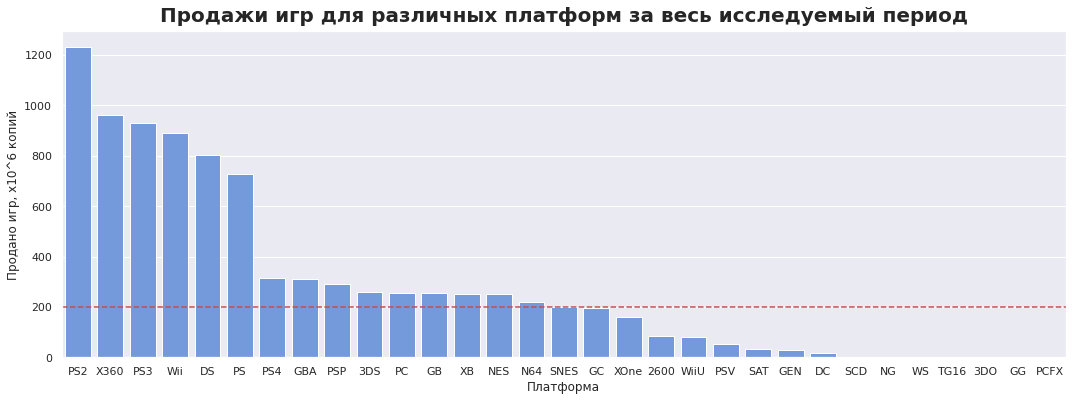

In [13]:
# графики количества проданных игр для различных консолей

console_life = console_life.sort_values(by='total', ascending=False)
plt.figure(figsize=[18,6])
sns.barplot(data=console_life, x='platform', y='total', color = 'cornflowerblue')
plt.axhline(y=console_life['total'].median(), color='r', linestyle='--')
plt.title("Продажи игр для различных платформ за весь исследуемый период",fontweight ="bold", fontsize='20', y=1.01)
plt.ylabel("Продано игр, х10^6 копий")
plt.xlabel("Платформа")
plt.show()



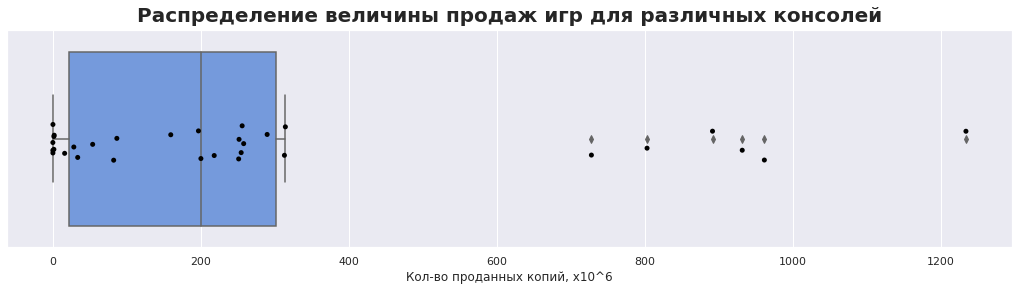

count      31.000000
mean      284.333871
std       343.953139
min         0.030000
25%        22.150000
50%       200.040000
75%       301.205000
max      1233.560000
Name: total, dtype: float64

In [14]:
# график распределения количества проданных игр с целью определения статистик
plt.figure(figsize=(18,4))
sns.boxplot(data=console_life['total'], orient='h',color='cornflowerblue')
sns.stripplot(x = "total",
              color = 'black',
              size = 5,
              alpha = 1,
              data = console_life)
plt.title("Распределение величины продаж игр для различных консолей",fontweight ="bold", fontsize='20', y=1.01)
plt.yticks([1], [''])
plt.xlabel("Кол-во проданных копий, x10^6")
plt.show()

display(console_life['total'].describe())

In [15]:
q4_console = console_life.query('total >304')['platform'].to_frame()

q4_console = q4_console.merge(games, how='inner', on='platform')

q4_console = q4_console.groupby(['platform','year_of_release'],as_index=False).agg({'na_sales':sum, 
                                   'eu_sales':sum, 
                                   'jp_sales':sum, 
                                   'other_sales':sum})

q4_console['total'] = q4_console['na_sales']+q4_console['eu_sales']+q4_console['jp_sales']+q4_console['other_sales']
display(q4_console.head(3))

platform year_of_release  na_sales  eu_sales  jp_sales  other_sales   total
0       DS      2004-01-01      8.33      3.93      3.65         1.36   17.27
1       DS      2005-01-01     47.99     41.49     29.86        10.80  130.14
2       DS      2006-01-01     50.01     23.07     38.56         8.17  119.81

In [16]:
# интерактивный график динамики продаж игр на платформах 4го квартиля по общему кол-ву продаж за наблюдаемый период

fig = px.line(q4_console, x="year_of_release", y="total", color='platform')
fig.update_layout(
    legend=dict(y=.5),
    title_text='Динамика продаж игр для платформ q4 за весь исследуемый период ',
    title_font_color="black",
    title_font_size = 18,
    title_x=0.5,
    xaxis_title = 'Год',
    yaxis_title = 'млн. копий'
    )
fig.show()

***Вывод***  
Ежегодное производство видео-игр увеличивалось с 1980 года и достигло пика к 2008 году, когда было выпущено более 1400 игр. В дальнейшем производство снижалось до 2016 года, за который на рынок вышло только 502 игры, что соответствует уровню 2002 года. Всего с 1980 по 2016 год было выпущено 16444 игры, из которых 90% созданы позднее 1998 года.

При анализе всего исследуемого периода, установлена 31 платформа, для которых в различные периоды производились видео-игры. Платформа PC сохраняет свою актуальность на рынке на протяжении 31 года, что объяснимо универсальностью персональных компьютером. К неудачным проектам среди игровых платформ можно отнести 3DO, SCD, TG16, PCFX, GG, игровая разработка для данных платформ велась на протяжении 1 года и менее. Медиана актуальности игровой платформы на рынке (т.е. времени в течение которого для платформы выпускают игры) составила 6 лет.

Наибольший коммерческий успех среди платформ на всем горизонте исследования принадлежит PS2, за время ее существования продано свыше 1200 млн. игр. За PS2 в порядке убывания следуют Х360, PS3, Wii, DS, PS, GBA, PS4, все перечисленные платформы входят в четвертый квартиль по количеству проданных для них игр, медианный срок их актуальности на рынке соответствует таковому при анализе общей выборки платформ, т.е. 6 годам.


### Продажи игр за актуальный период исследования

Индустрия компьютерных игр стремительно развивается, появляются новые консоли, уходят с рынка старые - с целью прогнозирования важных для развития интернет-магазина метрик, следует ограничить исследуемую выборку. Учитывая вышеизложенные факты, установлено, что медиана продолжительности выпуска игр на платформу составила 6 лет. В этот период входит и фаза роста продаж и фаза снижения, заканчивающаяся полным прекращением производства игр для консоли. Таким образом принято решение для выбора актуального перирда для исследования взять точку отсечения в 3 года. Следовательно, для дальнейшего анализа будут использованы данные об играх выпущенных позже 2013 года.   
Стоит отметить, что к дате проведения анализа выпуск игр под ряду платформ не производился на протяжении года и более. Принято решение исключить из дальнейшего анализа платформы, для которых игры не выпускались на протяжении более одного года.

In [17]:
actual_data = games.query('year_of_release > "2013-01-01"') # ограничиваем датасет по дате
display(actual_data.head(3))

name platform year_of_release  \
31                  Call of Duty: Black Ops 3      PS4      2015-01-01   
42                         Grand Theft Auto V      PS4      2014-01-01   
47  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS      2014-01-01   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
31       Shooter      6.03      5.86      0.36         2.38           NaN   
42        Action      3.96      6.31      0.38         1.97          97.0   
47  Role-Playing      4.35      3.49      3.10         0.74           NaN   

    user_score   rating  sum_sales  
31         NaN  no_data      14.63  
42         8.3        M      12.62  
47         NaN  no_data      11.68

In [18]:
actual_console = actual_data.groupby(['platform','year_of_release'],as_index=False)['sum_sales'].sum()

# считаем кумулятивное количество продаж игр на платформах за актуальный период
actual_console['cumul_total'] = actual_console.groupby('platform')['sum_sales'].cumsum()

# считаем долю продаж каждой платформы от общего количества продаж за каждый год
actual_console['part_of_market'] = [
    (x/ actual_console.query(
    'year_of_release == @ actual_console["year_of_release"][@idx]'
    )['sum_sales'].sum(
    )*100).round(2) for idx,x in enumerate(actual_console['sum_sales'])]

display(actual_console.head(3))

platform year_of_release  sum_sales  cumul_total  part_of_market
0      3DS      2014-01-01      43.76        43.76           13.20
1      3DS      2015-01-01      27.78        71.54           10.37
2      3DS      2016-01-01      15.14        86.68           11.65

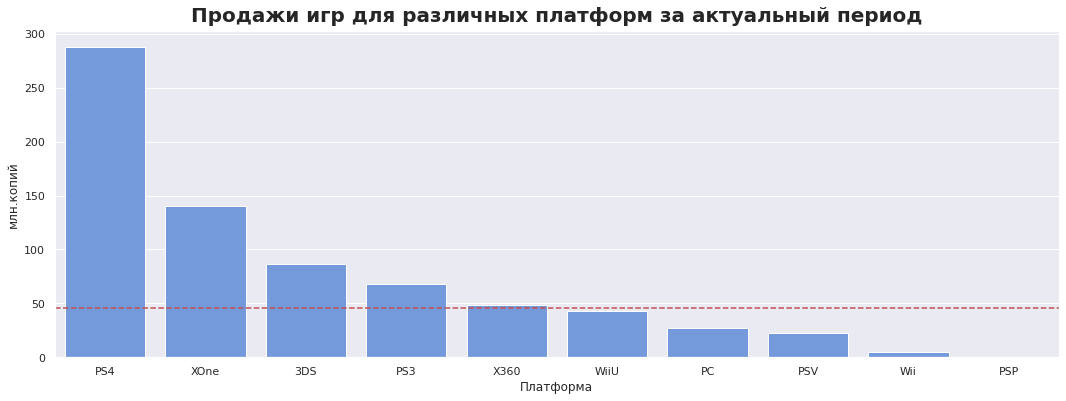

'За период 2014-2016 год продано 729.45 млн. копий'

In [19]:
# графики количества проданных игр для различных консолей за актуальный период

actual_total_sales = actual_console.groupby('platform',as_index=False)['sum_sales'].sum()
actual_total_sales = actual_total_sales.sort_values(by='sum_sales', ascending=False)
plt.figure(figsize=[18,6])
sns.barplot(data=actual_total_sales, x='platform', y='sum_sales', color = 'cornflowerblue')
plt.axhline(y=actual_total_sales['sum_sales'].median(), color='r', linestyle='--')
plt.title("Продажи игр для различных платформ за актуальный период",fontweight ="bold", fontsize='20', y=1.01)
plt.ylabel("млн.копий")
plt.xlabel("Платформа")
plt.show()

total= actual_data['sum_sales'].sum()
display(f'За период 2014-2016 год продано {total.round(2)} млн. копий')

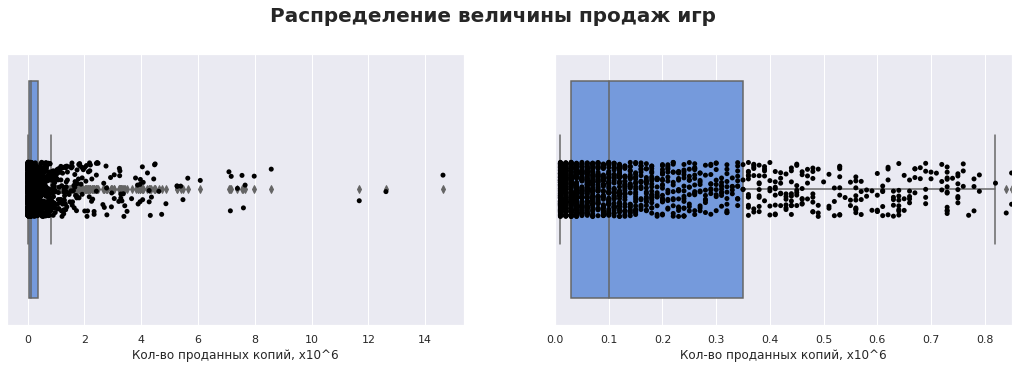

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: sum_sales, dtype: float64

In [20]:
# График распределения величины продаж игр
fig,axes = plt.subplots(1,2, figsize = (18,5), sharey=False)
sns.boxplot(x=actual_data['sum_sales'], orient='h',color='cornflowerblue', ax=axes[0])
sns.stripplot(x = "sum_sales",
              color = 'black',
              size = 5,
              alpha = 1,
              data = actual_data,ax=axes[0])
plt.yticks([1], [''])
axes[0].set(xlabel ="Кол-во проданных копий, x10^6")
sns.boxplot(x=actual_data['sum_sales'], orient='h',color='cornflowerblue', ax=axes[1])
sns.stripplot(x = "sum_sales",
              color = 'black',
              size = 5,
              alpha = 1,
              data = actual_data,ax=axes[1])
plt.yticks([1], [''])
axes[1].set(xlabel ="Кол-во проданных копий, x10^6")
plt.xlim(0, 0.85)
plt.suptitle("Распределение величины продаж игр",fontweight ="bold", fontsize='20', y=1.01)
plt.show()

display(actual_data['sum_sales'].describe())


In [21]:
# какие консоли лидируют по продажам
# какие растут какие падают

fig = px.line(actual_console, x="year_of_release", y="sum_sales", color='platform')
fig.update_layout(
    legend=dict(y=.5),
    title_text='Динамика продаж игр для платформ за актуальный период ',
    title_font_color="black",
    title_font_size = 18,
    title_x=0.5,
    xaxis_title = 'Год',
    yaxis_title = 'млн. копий'
    )
fig.show()

In [22]:
# строим area plot для оценки динамики доли продаж на каждую платформу от глобального кол-ва продаж
# определение рейтинга платформ по доле рынка на 2016 год

fig = px.area(actual_console, x="year_of_release", y="part_of_market", color="platform")
fig.update_layout(
    legend=dict(y=.5),
    title_text='Динамика изменения доли рынка по продажам игр для различных платформ',
    title_font_color="black",
    title_font_size = 18,
    title_x=0.5,
    xaxis_title = 'Год',
    yaxis_title = 'Доля от общего кол-ва продаж, %'
    )
fig.show()

market_rating = actual_console.query(
    'year_of_release == "2016-01-01"')[
    ['platform','year_of_release','part_of_market']].sort_values(by='part_of_market', ascending=False)
display(market_rating)

platform year_of_release  part_of_market
11      PS4      2016-01-01           53.29
28     XOne      2016-01-01           20.12
2       3DS      2016-01-01           11.65
5        PC      2016-01-01            4.04
22     WiiU      2016-01-01            3.54
16      PSV      2016-01-01            3.27
8       PS3      2016-01-01            2.77
25     X360      2016-01-01            1.17
19      Wii      2016-01-01            0.14

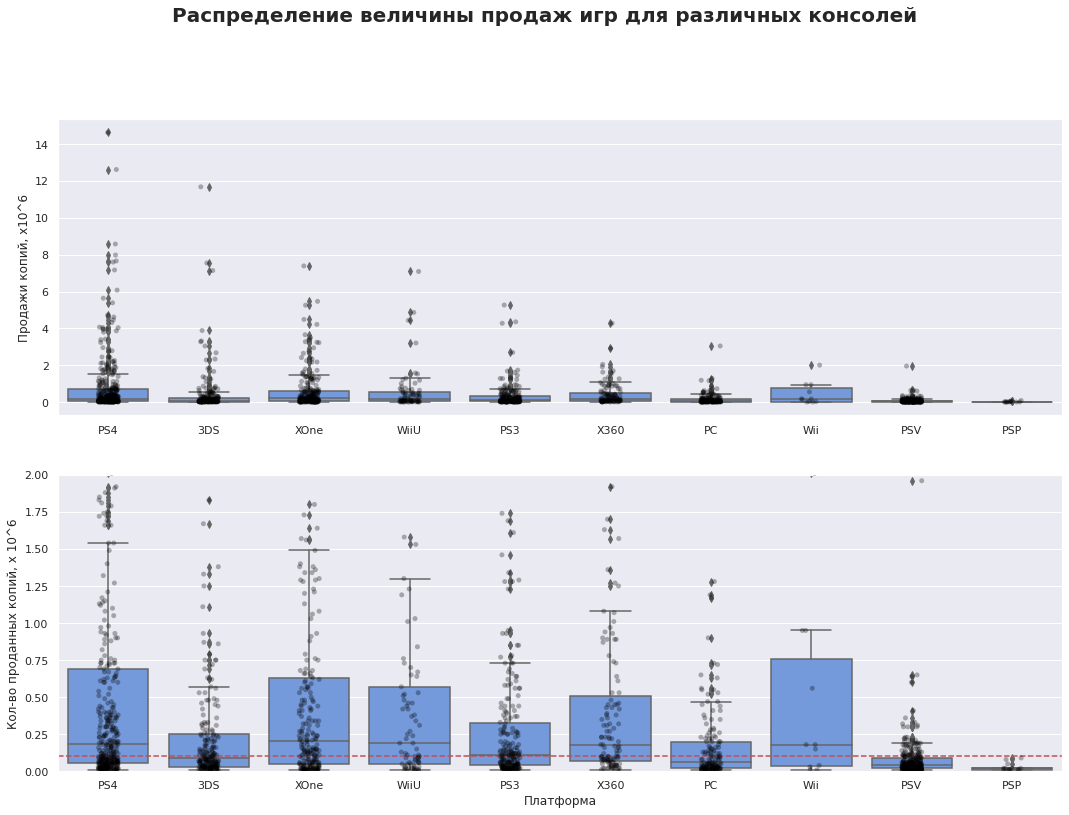

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: sum_sales, dtype: float64

platform     q25  median     q75      mean       std
9     XOne  0.0500   0.205  0.6325  0.615614  1.046513
7     WiiU  0.0500   0.190  0.5700  0.588767  1.161467
3      PS4  0.0575   0.185  0.6900  0.766356  1.614969
6      Wii  0.0350   0.180  0.7550  0.460909  0.625451
8     X360  0.0700   0.180  0.5050  0.434414  0.628967
2      PS3  0.0400   0.110  0.3250  0.311324  0.633059
0      3DS  0.0300   0.090  0.2500  0.408868  1.188368
1       PC  0.0200   0.060  0.2000  0.179139  0.329359
5      PSV  0.0200   0.040  0.0900  0.075932  0.141591
4      PSP  0.0100   0.020  0.0200  0.027692  0.027735

In [23]:
# построение графика распределения величины продаж игр для различных консолей
# определение рейтинга наиболее успешных платформ

#actual_console = actual_console.sort_values(by=['total'], ascending=False)
fig, axes = plt.subplots(2,1,figsize=(18,12))
sns.boxplot(data=actual_data, y='sum_sales', x='platform', orient='v',color='cornflowerblue',ax=axes[0])
sns.stripplot(y = "sum_sales",
              x='platform',
              color = 'black',
              size = 5,
              alpha = .3,
              data = actual_data,ax=axes[0])
axes[0].set(xlabel = '', ylabel = "Продажи копий, х10^6"),
sns.boxplot(data=actual_data, y='sum_sales', x='platform', orient='v',color='cornflowerblue',ax=axes[1])
sns.stripplot(y = "sum_sales",
              x='platform',
              color = 'black',
              size = 5,
              alpha = .3,
              data = actual_data,ax=axes[1])
axes[1].set(xlabel = '', ylabel = "Продажи копий, х10^6")
plt.ylim(0,2)
plt.axhline(y=actual_data['sum_sales'].median(), color='r', linestyle='--')
plt.suptitle("Распределение величины продаж игр для различных консолей",fontweight ="bold", fontsize='20', y=1.01)
plt.ylabel("Кол-во проданных копий, х 10^6")
plt.xlabel("Платформа")
plt.show()

display(actual_data['sum_sales'].describe())

# 25й процентиль
def q25(x):
    return x.quantile(0.25)

# 75й процентиль
def q75(x):
    return x.quantile(0.75)

sale_per_year = actual_data.groupby('platform',as_index=False
                                      )['sum_sales'].agg(
    [q25,'median',q75,'mean','std']).reset_index().sort_values(by='median', ascending=False)

display(sale_per_year)

#display(f'Медиана ежегодных продаж за актуальный период: {actual_console["sum_sales"].median().round(2)}')

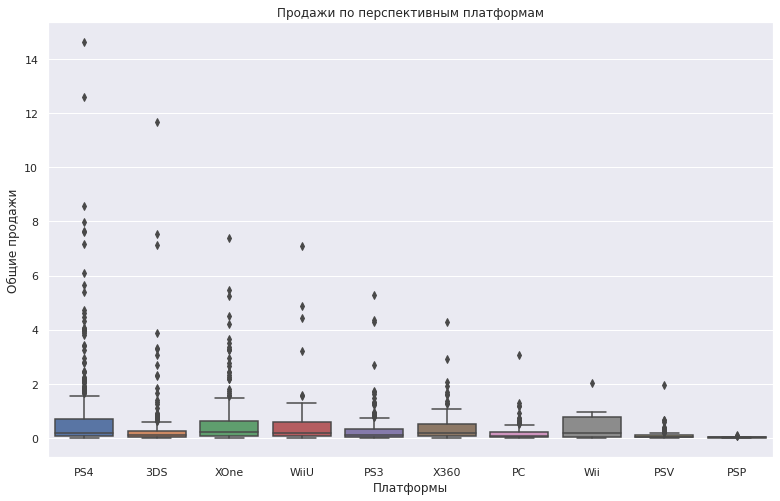

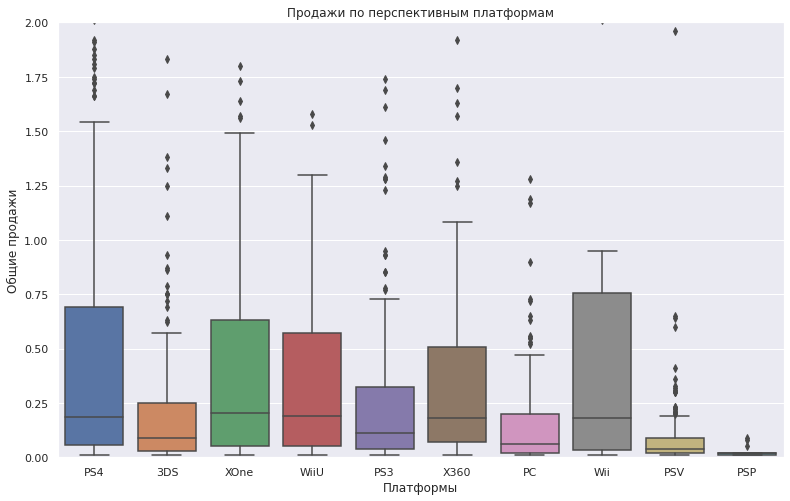

In [24]:
# Комментарий ревьюера 2
import seaborn as sns
data_temp, y = actual_data, 'sum_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 2)))
plt.show()

***Вывод***  
За период 2014-2016 год продано 729.45 млн. копий. Медиана продаж копий игры за актуальный период (2014-2016) варьировала от 10000 до 14,6 млн. с медианой в 100000 копий. Согласно графику динамики продаж игр для платформ за актуальный период - продажи игр снижаются для каждой из консолей. При анализе измениния динамики доли рынка по продажам игр для различных платформ установлено, что на 2016 год платформа PS4 занимает 53% доли рынка по объему продаж, за ней следует платформа XOne (20%). На момент анализа данные платформы сохраняют тенденцию к росту продаж. Показатель медианы количества продаж наиболее высок для XOne - 205 тыс. копий, WiiU - 190 тыс., PS4 - 185 тыс.  

### Влияние отзывов пользователей и критиков на продажи игр для различных платформ

In [25]:
# Определим по три платформы с наилучшими и наихудшими годовыми продажами
test_rating_list = sale_per_year['platform'].head(3).to_list()
display(test_rating_list)

['XOne', 'WiiU', 'PS4']

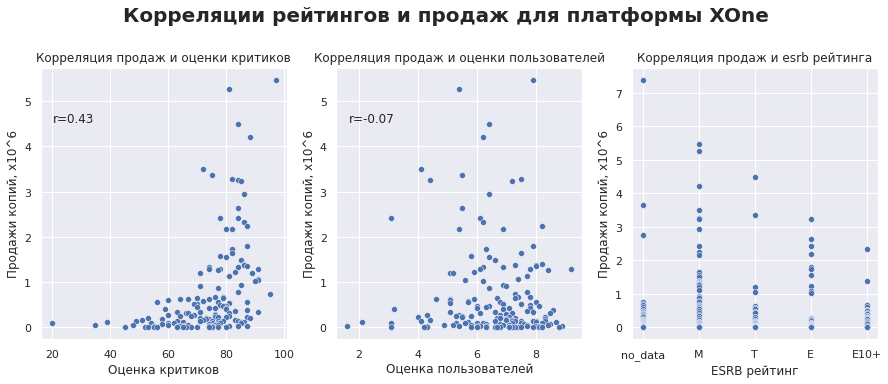

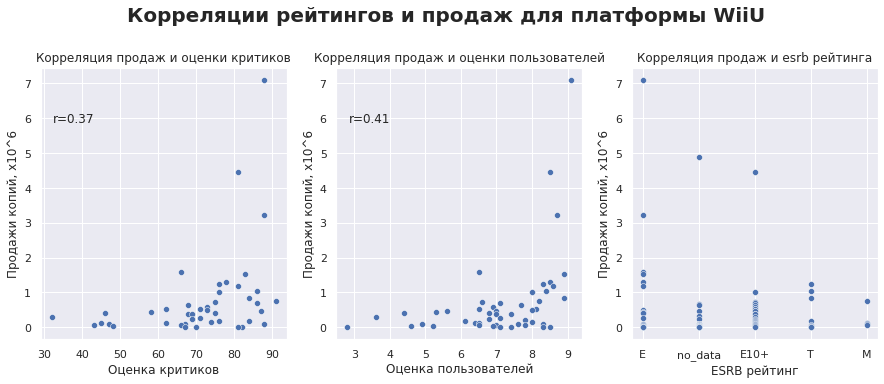

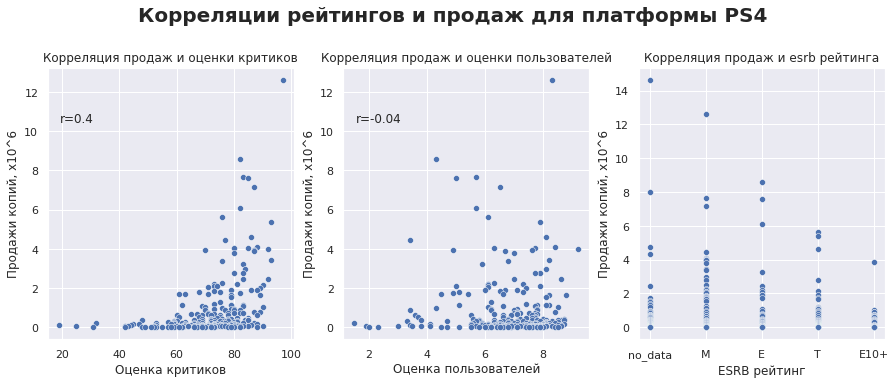

In [26]:
# строим скаттерплоты и ищем зависимости между продажами и рейтингами, считаем коэффициенты корреляции

#actual_data['total'] = actual_data['na_sales']+actual_data['eu_sales']+actual_data['jp_sales']+actual_data['other_sales']

for name in test_rating_list:
    test_rating = actual_data.query('platform == @name')
    test_critic = test_rating.dropna(subset=['critic_score'])
    
    test_user = test_rating.dropna(subset=['user_score'])
    #test_user = test_user.query('user_score != "tbd"') # для ряда игр пользовательский рейтинг определен как tbd
    #test_user['user_score'] = test_user['user_score'].astype(float) # данные наблюдения удалим из выборки
    
    test_esrb = test_rating.dropna(subset=['rating'])
    
    fig,axes = plt.subplots(1,3, figsize = (15,5), sharey=False)
    sns.scatterplot(data = test_critic, x = 'critic_score', y= 'sum_sales', ax=axes[0])
    axes[0].set(title=('Корреляция продаж и оценки критиков'),
                xlabel ="Оценка критиков", ylabel = "Продажи копий, х10^6")
    plt.text(.05,.8,f'r={(stats.pearsonr(test_critic["critic_score"],test_critic["sum_sales"])[0]).round(2)}',
             transform=axes[0].transAxes)
    
    sns.scatterplot(data = test_user, x = 'user_score', y= 'sum_sales', ax=axes[1])
    axes[1].set(title=('Корреляция продаж и оценки пользователей'),
               xlabel ="Оценка пользователей", ylabel = "Продажи копий, х10^6")
    plt.text(.05,.8,f'r={(stats.pearsonr(test_user["user_score"],test_user["sum_sales"])[0]).round(2)}',
             transform=axes[1].transAxes)
    
    sns.scatterplot(data = test_esrb, x = 'rating', y= 'sum_sales', ax=axes[2])
    axes[2].set(title=('Корреляция продаж и esrb рейтинга'),
               xlabel ="ESRB рейтинг", ylabel = "Продажи копий, х10^6")
    #plt.text(.05,.8,f'r={(stats.pearsonr(test_esrb["rating"],test_esrb["total"])[0]).round(2)}',
    #         transform=axes[2].transAxes)
    
    plt.suptitle(f"Корреляции рейтингов и продаж для платформы {name}",fontweight ="bold", fontsize='20', y=1.05)
    plt.show()
    



***Вывод***

Анализ корреляции оценок критиков и пользователей с уровнем продаж проведен для трех наиболее коммерчески успешных платформ. Достоверной корреляции оценок с уровнем продаж не установлено ни для одной из выбранных платформ. 

### Распределение игр по жанрам

In [27]:
display(actual_data.head(3))

name platform year_of_release  \
31                  Call of Duty: Black Ops 3      PS4      2015-01-01   
42                         Grand Theft Auto V      PS4      2014-01-01   
47  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS      2014-01-01   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
31       Shooter      6.03      5.86      0.36         2.38           NaN   
42        Action      3.96      6.31      0.38         1.97          97.0   
47  Role-Playing      4.35      3.49      3.10         0.74           NaN   

    user_score   rating  sum_sales  
31         NaN  no_data      14.63  
42         8.3        M      12.62  
47         NaN  no_data      11.68

In [28]:
# группируем количество проданных копий по жанрам
genre_games = actual_data.groupby('genre',as_index=False)['sum_sales'].sum().sort_values(
    by='sum_sales', ascending=False)
genre_games['part_of_market'] = (genre_games['sum_sales'] / genre_games['sum_sales'].sum() * 100).round(2)
display(genre_games)

genre  sum_sales  part_of_market
0         Action     199.36           27.33
8        Shooter     170.94           23.43
10        Sports     109.48           15.01
7   Role-Playing     101.44           13.91
3           Misc      37.55            5.15
2       Fighting      28.22            3.87
6         Racing      27.52            3.77
4       Platform      18.09            2.48
1      Adventure      17.55            2.41
9     Simulation      13.13            1.80
11      Strategy       3.96            0.54
5         Puzzle       2.21            0.30

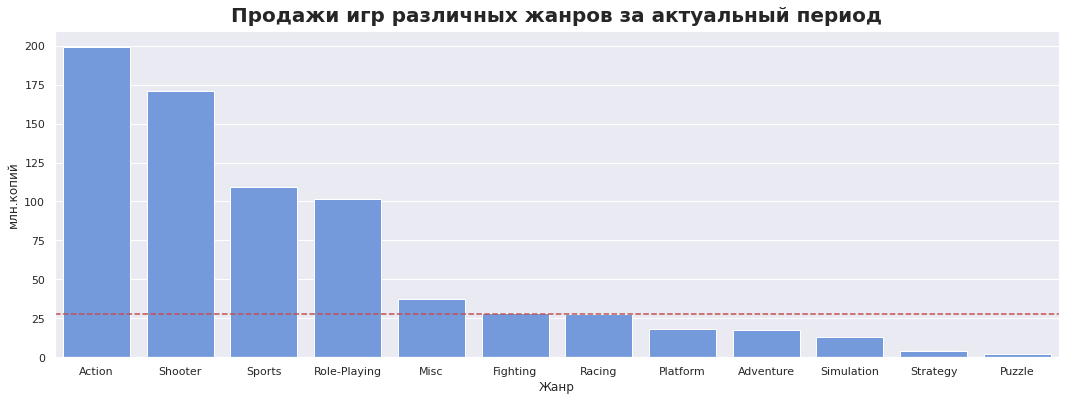

In [29]:
# график распределения продаж игр по жанрам 
plt.figure(figsize=[18,6])
sns.barplot(data=genre_games, x='genre', y='sum_sales', color = 'cornflowerblue')
plt.axhline(y=genre_games['sum_sales'].median(), color='r', linestyle='--')
plt.title("Продажи игр различных жанров за актуальный период",fontweight ="bold", fontsize='20', y=1.01)
plt.ylabel("млн.копий")
plt.xlabel("Жанр")
plt.show()

In [30]:
genre_stability = actual_data.groupby(['genre'],as_index=False).agg({'sum_sales':['median','sum']})

genre_stability.columns = ['_'.join(col) for col in genre_stability.columns]
genre_stability = genre_stability.rename(columns={'year_of_release_':'year_of_release',
                                                 'genre_':'genre',
                                                 'sum_sales_median':'sales_median',
                                                 'sum_sales_sum':'sales_sum'})


display(genre_stability.sort_values(by='sales_median', ascending=False))

genre  sales_median  sales_sum
8        Shooter         0.515     170.94
10        Sports         0.180     109.48
4       Platform         0.140      18.09
2       Fighting         0.125      28.22
7   Role-Playing         0.110     101.44
9     Simulation         0.100      13.13
0         Action         0.090     199.36
3           Misc         0.090      37.55
6         Racing         0.090      27.52
11      Strategy         0.060       3.96
5         Puzzle         0.045       2.21
1      Adventure         0.030      17.55

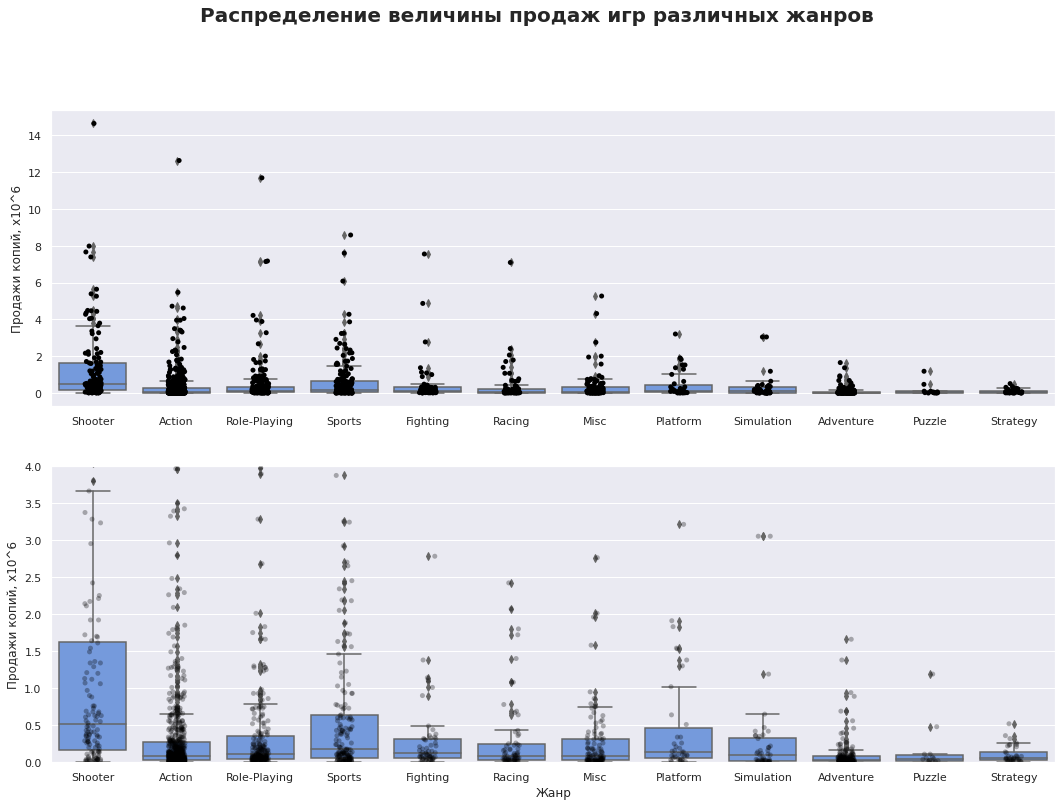

In [31]:
# график распределения величины продаж игр различных жанров

fig, axes = plt.subplots(2,1,figsize=(18,12))
sns.boxplot(data=actual_data, y='sum_sales', x='genre', orient='v',color='cornflowerblue',ax=axes[0])
sns.stripplot(data=actual_data,y = "sum_sales",
              x='genre',
              color = 'black',
              size = 5,
              alpha = 1,ax=axes[0])
axes[0].set(xlabel = '', ylabel = "Продажи копий, х10^6"),
sns.boxplot(data=actual_data, y='sum_sales', x='genre', orient='v',color='cornflowerblue',ax=axes[1])
sns.stripplot(data=actual_data,y = "sum_sales",
              x='genre',
              color = 'black',
              size = 5,
              alpha = .3,ax=axes[1])
axes[1].set(xlabel = '', ylabel = "Продажи копий, х10^6"),
plt.ylim(0,4)
plt.suptitle("Распределение величины продаж игр различных жанров",fontweight ="bold", fontsize='20', y=1.)
plt.xlabel("Жанр")
plt.show()

In [32]:
genre_stability['part_of_market'] = [
    (x/ genre_stability['sales_sum'].sum(
    )*100).round(2) for x in (genre_stability['sales_sum'])]

display(genre_stability.sort_values(by='part_of_market',ascending=False))

genre  sales_median  sales_sum  part_of_market
0         Action         0.090     199.36           27.33
8        Shooter         0.515     170.94           23.43
10        Sports         0.180     109.48           15.01
7   Role-Playing         0.110     101.44           13.91
3           Misc         0.090      37.55            5.15
2       Fighting         0.125      28.22            3.87
6         Racing         0.090      27.52            3.77
4       Platform         0.140      18.09            2.48
1      Adventure         0.030      17.55            2.41
9     Simulation         0.100      13.13            1.80
11      Strategy         0.060       3.96            0.54
5         Puzzle         0.045       2.21            0.30

***Вывод***  
При анализе наиболее коммерчески привлекательных жанров установлено, что за период 2014-2016 г., наиболее высокий показатель медианы продаж иммет жанр Shooter - 515 тыс.копий, однако занимает 2е место по доле рынка. Для жанра Sports медиана продаж составила 180 тыс. копий, 3ю строчку рейтинга занял жанр Platform с показателем 140 тыс. копий. 

## Особенности рынка в регионах

### Топ-5 популярных платформ по регионам

In [33]:
platform_by_region = actual_data.groupby('platform')[['na_sales','eu_sales','jp_sales','other_sales']].sum()
display(platform_by_region)

na_sales  eu_sales  jp_sales  other_sales
platform                                           
3DS          22.64     16.12     44.24         3.68
PC            7.23     17.97      0.00         1.85
PS3          22.05     25.54     11.22         9.37
PS4          98.61    130.04     15.02        44.48
PSP           0.00      0.00      0.36         0.00
PSV           2.52      3.53     14.54         1.81
Wii           2.08      2.59      0.00         0.40
WiiU         19.36     13.15      7.31         3.16
X360         28.30     15.49      0.08         4.35
XOne         81.27     46.25      0.32        12.52

/tmp/ipykernel_116916/618170586.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_116916/618170586.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



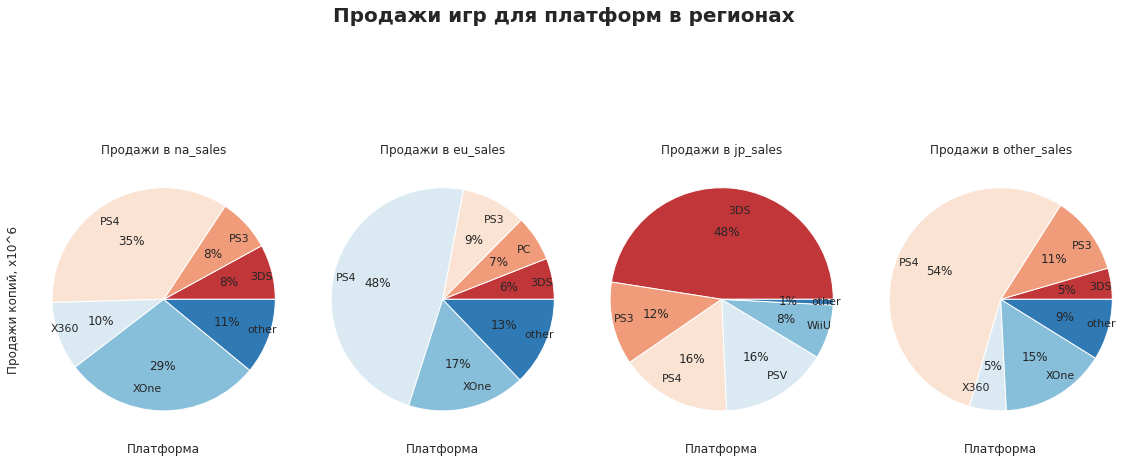

In [34]:
# строим графики уровня продаж на различные платформы по регионам
colors = sns.color_palette('RdBu')

fig,axes = plt.subplots(1,4, figsize = (20,8), sharex=True, sharey=True,gridspec_kw={'wspace':0}) #объединим шкалы через share

for idx,i in enumerate(platform_by_region.columns):
    platform_restrict = platform_by_region[i].reset_index().sort_values(by=i,ascending=False,ignore_index=True)
    platform_restrict['group'] = platform_restrict['platform']
    for idt,t in enumerate(platform_restrict['group']):
        if idt <5:
            platform_restrict['group'][idt]=platform_restrict['platform'][idt]
        else:
            platform_restrict['group'][idt]='other'
    platform_restrict= platform_restrict.groupby('group',as_index=False)[i].sum()
    
    axes[idx].pie(platform_restrict[i], labels=platform_restrict['group'],colors = colors, 
                  autopct='%.0f%%',labeldistance=0.8)
    axes[idx].set(title=f'Продажи в {i}',
                        xlabel = 'Платформа', ylabel = "Продажи копий, х10^6"),
    axes[idx].label_outer()

plt.suptitle("Продажи игр для платформ в регионах",fontweight ="bold", fontsize='20', y=1.01)
plt.show()



***Вывод***  
В пятерку платформ-лидеров в странах Северной Америки вошли PS4 (98.61 млн), Xone (81.27 млн), X360 (28.30 млн), 3DS (22.64 млн), PS3 (22.05 млн.). 
Для Европы в топ-5 входят PS4 (130.04 млн.), XOne(46.25), PS3 (25.54 млн.), PC (17.97), 3DS (16.12).
В Японии первое место по продажам заняла платворма 3DS (44.24 млн.), второе PS4 (15.02 млн.), третье PSV (14.54 млн), далее следуют PS3 (11.22) и WiiU (7.31). 
В других странах рейтинг cхож с Европой, однако продажи существенно ниже -  PS4 (44.48 млн.), XOne (12.52 млн.), PS3 (9.37 млн.), далее X360 (4.35) и 3DS (3.68). Самым крупным рынком игровой индустрии является США, далее следует Европа, Япония и остальные страны.

### Топ-5 популярных жанров по регионам

In [35]:
genre_by_region = actual_data.groupby('genre')[['na_sales','eu_sales','jp_sales','other_sales']].sum()
display(genre_by_region)

na_sales  eu_sales  jp_sales  other_sales
genre                                                  
Action           72.53     74.68     29.58        22.57
Adventure         5.64      6.49      3.60         1.82
Fighting         12.43      6.69      6.37         2.73
Misc             15.05     12.86      5.61         4.03
Platform          6.79      6.80      2.69         1.81
Puzzle            0.65      0.52      0.93         0.11
Racing            8.74     14.13      1.76         2.89
Role-Playing     33.47     28.17     31.16         8.64
Shooter          79.02     65.52      4.87        21.53
Simulation        2.63      7.30      2.31         0.89
Sports           46.13     45.73      3.26        14.36
Strategy          0.98      1.79      0.95         0.24

/tmp/ipykernel_116916/563677495.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_116916/563677495.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



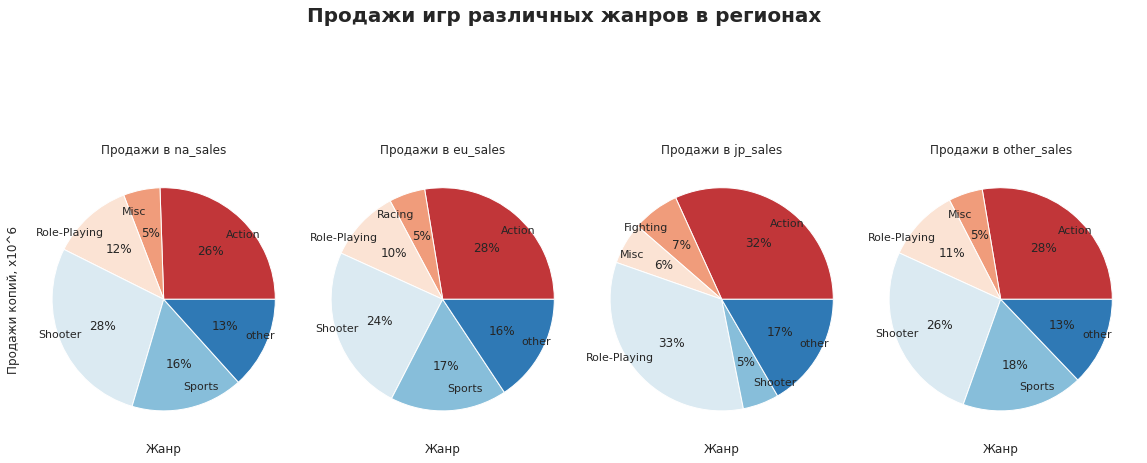

In [36]:
fig,axes = plt.subplots(1,4, figsize = (20,8), sharex=True, sharey=True,gridspec_kw={'wspace':0}) #объединим шкалы через share

for idx,i in enumerate(genre_by_region.columns):
    genre_restrict = genre_by_region[i].reset_index().sort_values(by=i,ascending=False,ignore_index=True)
    genre_restrict['group'] = genre_restrict['genre']
    for idt,t in enumerate(genre_restrict['group']):
        if idt <5:
            genre_restrict['group'][idt]=genre_restrict['genre'][idt]
        else:
            genre_restrict['group'][idt]='other'
    genre_restrict= genre_restrict.groupby('group',as_index=False)[i].sum()
    
    axes[idx].pie(genre_restrict[i], labels=genre_restrict['group'],colors = colors, 
                  autopct='%.0f%%',labeldistance=0.8)
    axes[idx].set(title=f'Продажи в {i}',
                        xlabel = 'Жанр', ylabel = "Продажи копий, х10^6"),
    axes[idx].label_outer()

plt.suptitle("Продажи игр различных жанров в регионах",fontweight ="bold", fontsize='20', y=1.01)
plt.show()

***Вывод***   
 В пятерку игровых жанров-лидеров в странах Северной Америки вошли Shooter (79.02 млн.), Action (72.53 млн), Sports(46.13 млн.), RPG (33.47) и Misc (15.05).
 Для Европы в топ-5 входят Action (74.68 млн.), Shooter (65.52 млн.) и Sports (45.73 млн.), RPG (28.17), Racing ()14.13.   
 В Японии первое место по продажам занял жанр RPG (31.16 млн.), второе Action (29.58 млн.), третье Fighting (6.37),  Misc (5.61 млн), Shooter (4.87). В других странах рейтинг схож с США и Европой, однако продажи существенно ниже - Action (22.57 млн.), Shooter (21.53 млн.) и Sports (14.36 млн.), RPG (8.64), Misc (4.03). 

### Влияние рейтинга ESRB на продажи в регионах

In [37]:
ersb_by_region = actual_data.groupby('rating')[['na_sales','eu_sales','jp_sales','other_sales']].sum()
display(ersb_by_region)

na_sales  eu_sales  jp_sales  other_sales
rating                                            
E           50.74     58.06      8.94        15.39
E10+        33.23     26.16      4.46         7.83
M           96.42     93.44      8.01        28.67
T           38.95     34.07     14.78        11.33
no_data     64.72     58.95     56.90        18.40

/tmp/ipykernel_116916/828532535.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



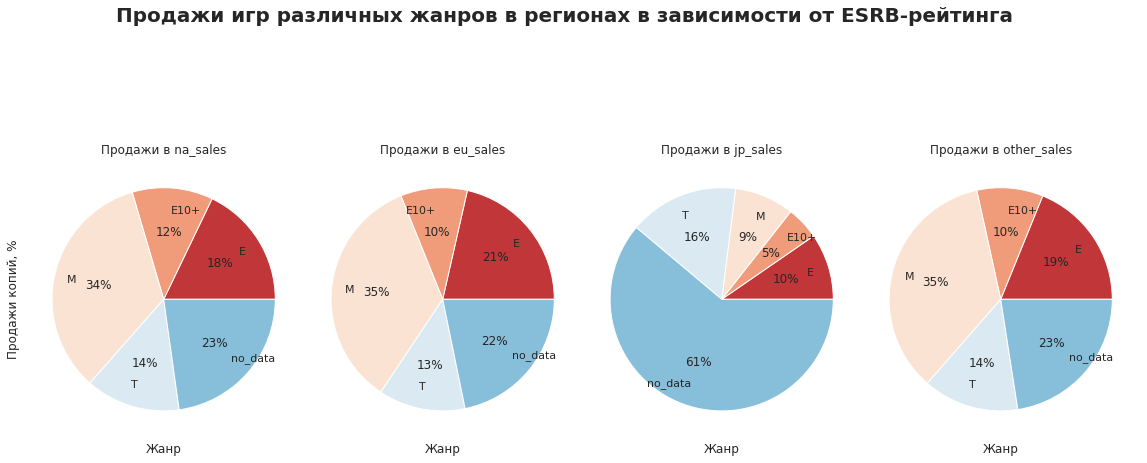

In [38]:
fig,axes = plt.subplots(1,4, figsize = (20,8), sharex=True, sharey=True,gridspec_kw={'wspace':0}) #объединим шкалы через share

for idx,i in enumerate(ersb_by_region.columns):
    ersb_restrict = ersb_by_region[i].reset_index().sort_values(by=i,ascending=False,ignore_index=True)
    ersb_restrict['group'] = ersb_restrict['rating']
    for idt,t in enumerate(ersb_restrict['group']):
        if idt <5:
            ersb_restrict['group'][idt]=ersb_restrict['rating'][idt]
        else:
            ersb_restrict['group'][idt]='other'
    ersb_restrict= ersb_restrict.groupby('group',as_index=False)[i].sum()
    
    axes[idx].pie(ersb_restrict[i], labels=ersb_restrict['group'],colors = colors, 
                  autopct='%.0f%%',labeldistance=0.8)
    axes[idx].set(title=f'Продажи в {i}',
                        xlabel = 'Жанр', ylabel = "Продажи копий, %")#, yticks([1], ['']))
    #axes[idx].set_yticklabels
    axes[idx].label_outer()
    #axes[idx].yticks([1], [''])


plt.suptitle("Продажи игр различных жанров в регионах в зависимости от ESRB-рейтинга",fontweight ="bold", fontsize='20', y=1.01)
plt.show()

***Вывод***  
 Игры с рейтингом М являются самыми продаваемыми в странах Северной Америки - 96.42 млн. копий. За ними следуют игры для которых нет информации о рейтинге - 64.72, далее с рейтингом Е - 50.74 млн., Т - 38.95, Е10+ - 33.23 млн. 
 Для стран Европы данный показатели составили - М - 93.44 млн., без рейтинга - 58.95, Е - 58,06 млн., Т - 34,07 млн, Е10+ - 26.16 млн. 
 В Японии наиболее популярны игры без данных о рейтинге - 56.90 млн, с рейтингом Т 14.78 млн., Е - 8.94 млн., M - 8.01 млн, за ними следуют игры с рейтингом Е10+ - 4.46 млн., М - 26.14 млн., Е10+ - 11,2 млн. 
 В других странах рейтинг схож с Европой, однако продажи существенно ниже - М - 28.67 млн., без указания рейтинга - 18.40 млн, Е - 15.39 млн., Т - 11.33 млн, Е10+ - 7,83 млн. 
 Стоит отметить, что рейтинг ESRB предназначен только для стран Северной Америки, таким образом оценка его в иных регионах имеет сомнительное значение.

In [39]:
# Комментарий ревьюера
temp = actual_data.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


no_data    749
T          271
M          265
E          219
E10+       185
Name: rating, dtype: int64

## Проверка продуктовых гипотез

### Оценка пользователями платформ Xbox One и PC

-Необходимо проверить - одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC. Для этого установим по умолчанию утверждение о том что средние рейтинги равны и попробуем опровергнуть его.  
-Следовательно нулевая гипотеза (𝐻0) : средние пользовательские рейтинги платформ Xbox One и PC равны.  
-Альтернативная гипотеза (𝐻1) : средние пользовательские рейтинги платформ Xbox One и PC не равны. (Гипотеза двусторонняя).    
-Критерий для проверки нулевой гипотезы : критерий Стьюдента для несвязанных выборок при нормальном распределении или критерий Манна-Уитни при ненормальном распределении и отсутствии повторяющихся значений. В качестве теста для оценки нормальности распределения будет использован тест Шапиро-Уилка.  
-Уровень статистической значимости 𝛼: 5 %  

In [40]:
alpha = .05
def shapiro_result (s): # функция для вывода заключения о результатах теста на нормальность распределения
    result = stats.shapiro(s)[1]
    if result < alpha:
        display(f'p-значение: {result} - отвергаем нулевую гипотезу: распределение не нормально')
    else:
        display(f'p-значение: {result} - не удалось отвергнуть нулевую гипотезу: распределение нормально')

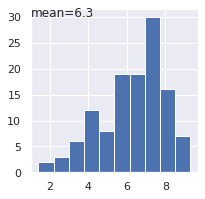

'Проверка на нормальность распределения оценок пользователей PC (n=122) :'

'p-значение: 0.0001799216988729313 - отвергаем нулевую гипотезу: распределение не нормально'

None

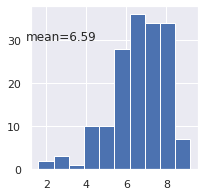

'Проверка на нормальность распределения оценок пользователей XOne (n=165) :'

'p-значение: 2.564911119407043e-05 - отвергаем нулевую гипотезу: распределение не нормально'

None

In [41]:
user_vote = actual_data.query('user_score != "tbd"') # для ряда игр пользовательский рейтинг определен как tbd
user_vote['user_score'] = user_vote['user_score'].astype(float) # данные наблюдения удалим из выборки
user_vote = user_vote.dropna(subset=['user_score'])

user_vote_pc = user_vote.query('platform == "PC"')['user_score']
user_vote_xone = user_vote.query('platform == "XOne"')['user_score']

plt.figure(figsize=(3,3))
plt.hist(user_vote_pc)
plt.text(1.0,30.0,f'mean={user_vote_pc.mean().round(2)}',
        )#transform=axes[1].transAxes)
plt.show()
display(f'Проверка на нормальность распределения оценок пользователей PC (n={user_vote_pc.count()}) :')
display(shapiro_result(user_vote_pc))

plt.figure(figsize=(3,3))
plt.hist(user_vote_xone)
plt.text(1.0,30.0,f'mean={user_vote_xone.mean().round(2)}',)
plt.show()
display(f'Проверка на нормальность распределения оценок пользователей XOne (n={user_vote_xone.count()}) :')
display(shapiro_result(user_vote_xone))

In [42]:
# Расчёт статистической значимости различий между группами  
    
ttest_platform  = stats.ttest_ind(
    user_vote_pc,
    user_vote_xone,
    equal_var = False)

display('p-значение:', ttest_platform.pvalue)

if ttest_platform.pvalue < alpha:
    display(f"Отвергаем нулевую гипотезу: {round(ttest_platform.pvalue,3)}")
else:
    display(f"Не удалось отвергнуть нулевую гипотезу: {round(ttest_platform.pvalue,3)}") 

'p-значение:'

0.11601398086668827

'Не удалось отвергнуть нулевую гипотезу: 0.116'

In [43]:
# Комментарий ревьюера
unique, counts = np.unique(user_vote_pc, return_counts=True)
a = dict(zip(unique, counts))
score = 8.2
print('Количество оценок',score, '-', a[score], 'штук')

Количество оценок 8.2 - 2 штук


***Вывод***  
P-value превышает 0.05. Значит гипотеза о равенстве средних пользовательских рейтингов для платформ XOne и PC не может быть отвергнута. 

### Оценка пользователями жанров Action и Sports

-Необходимо проверить - отличаются ли средние пользовательские рейтинги жанров Action и Sports. Для этого установим по умолчанию утверждение о том что средние рейтинги равны и попробуем опровергнуть его.  
-Следовательно нулевая гипотеза(𝐻0): средние пользовательские рейтинги жанров Action и Sports равны.  
-Альтернативная гипотеза (𝐻1) : средние пользовательские рейтинги жанров Action и Sports не равны. (Гипотеза двусторонняя).  
-Критерий для проверки нулевой гипотезы : критерий Стьюдента для несвязанных выборок при нормальном распределении или критерий Манна-Уитни при ненормальном распределении. В качестве теста для оценки нормальности распределения будет использован тест Шапиро-Уилка.  
-Уровень статистической значимости 𝛼: 5 %  

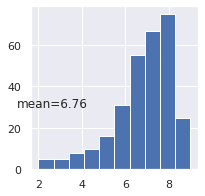

'Проверка на нормальность распределения оценок пользователей для жанра Action (n=297) :'

'p-значение: 1.3703333173048504e-12 - отвергаем нулевую гипотезу: распределение не нормально'

None

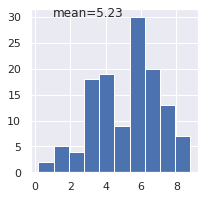

'Проверка на нормальность распределения оценок пользователей для жанра Sports (n=127) :'

'p-значение: 0.03466314077377319 - отвергаем нулевую гипотезу: распределение не нормально'

None

In [44]:
genre_vote = actual_data.query('user_score != "tbd"') # для ряда игр пользовательский рейтинг определен как tbd
genre_vote['user_score'] = genre_vote['user_score'].astype(float) # данные наблюдения удалим из выборки
genre_vote = genre_vote.dropna(subset=['user_score'])

genre_vote_action = genre_vote.query('genre == "Action"')['user_score']
genre_vote_sports = genre_vote.query('genre == "Sports"')['user_score']

plt.figure(figsize=(3,3))
plt.hist(genre_vote_action)
plt.text(1.0,30.0,f'mean={genre_vote_action.mean().round(2)}',)

plt.show()
display(f'Проверка на нормальность распределения оценок пользователей для жанра Action (n={genre_vote_action.count()}) :')
display(shapiro_result(genre_vote_action))

plt.figure(figsize=(3,3))
plt.hist(genre_vote_sports)
plt.text(1.0,30.0,f'mean={genre_vote_sports.mean().round(2)}',)
plt.show()
display(f'Проверка на нормальность распределения оценок пользователей для жанра Sports (n={genre_vote_sports.count()}) :')
display(shapiro_result(genre_vote_sports))

In [45]:
# Расчёт статистической значимости различий между группами

ttest_genre  = stats.ttest_ind(
    genre_vote_action,
    genre_vote_sports,
    equal_var = False)

if ttest_genre.pvalue < alpha:
    display(f"Отвергаем нулевую гипотезу: {round(ttest_genre.pvalue,3)}")
else:
    display(f"Не удалось отвергнуть нулевую гипотезу: {round(ttest_genre.pvalue,3)}") 

'Отвергаем нулевую гипотезу: 0.0'

***Вывод***  

P-value значительно меньше 0.05. Значит нельзя исключить наличие разницы средних пользовательских рейтингов жанров Action и Sports. 

## Общий вывод

 Этапы работы и их результаты :
  
1. В рамках проекта выполнена оценка предоставленных для анализа данных. Датасет включает 16443 наблюдений по 11 параметрам. Данные содержат информацию о видео-играх, установлено 11425 уникальных наименований игр, выпущенных за период с 1980 по 2016 год. Игры распределены по 12 жанрам и 31 игровым платформам. География наблюдений разделена на страны Северной Америки, Европу, Японию и Другие страны. По ряду параметров наблюдается следующая доля пропущенных значений: наименование - 0.01%, год выпуска - 1,61%, жанр - 0.01%, оценка критиков - 51,32%, оценка пользователей - 40,09%, рейтинг ESRB - 40,48%. 
  
  
2. Выполнен анализ динамики производства игр за весь исследуемый период, рассчитаны абсолютные, относительные и кумулятивные метрики уровня продаж, в зависимости от жанра, игровой платформы. По результатам даннам этапа установлено, что ежегодное производство видео-игр увеличивалось с 1980 года и достигло пика к 2008 году, когда было выпущено более 1400 игр. В дальнейшем производство снижалось до 2016 года, за который на рынок вышло только 502 игры, что соответствует уровню 2002 года. Всего с 1980 по 2016 год было выпущено 16444 игры, из которых 90% созданы позднее 1998 года. Как правило игровые платформы имеют ограниченный срок актуальности на рынке и со временем, разработка игр для них прекращается. Таким образом медиана актуальности игровой платформы на рынке (т.е. времени в течение которого для платформы выпускают игры) составила 6 лет. На данном фоне выделяется платформа РС, которая сохраняет свою актуальность на рынке на протяжении 31 года, что объяснимо универсальностью персональных компьютером. К неудачным проектам среди игровых платформ можно отнести 3DO, SCD, TG16, PCFX, GG, игровая разработка для данных платформ велась на протяжении 1 года и менее. Наибольший коммерческий успех среди платформ на всем горизонте исследования принадлежит PS2, за время ее существования продано свыше 1200 млн. игр. За PS2 в порядке убывания следуют Х360, PS3, Wii, DS, PS, GBA, PS4, все перечисленные платформы входят в четвертый квартиль по количеству проданных для них игр, медианный срок их актуальности на рынке соответствует таковому при анализе общей выборки платформ, т.е. 6 годам.
  
  
3. Индустрия компьютерных игр стремительно развивается, появляются новые консоли, уходят с рынка старые - с целью прогнозирования важных для развития интернет-магазина метрик, следует ограничить исследуемую выборку. Учитывая вышеизложенные факты, установлено, что медиана продолжительности выпуска игр на платформу составила 6 лет. В этот период входит и фаза роста продаж и фаза снижения, заканчивающаяся полным прекращением производства игр для консоли. Таким образом принято решение для выбора актуального перирда для исследования взять точку отсечения в 3 года. Следовательно, для дальнейшего анализа будут использованы данные об играх выпущенных позже 2013 года. 

  
4. Выполнен анализ динамики производства игр за актуальный период, рассчитаны абсолютные, относительные и кумулятивные метрики уровня продаж, в зависимости от жанра, игровой платформы. Установлено, что за период 2014-2016 год продано 729.45 млн. копий. Медиана продаж копий игры за актуальный период (2014-2016) варьировала от 10000 до 14,6 млн. с медианой в 100000 копий. Согласно графику динамики продаж игр для платформ за актуальный период - продажи игр снижаются для каждой из консолей. При анализе измениния динамики доли рынка по продажам игр для различных платформ установлено, что на 2016 год платформа PS4 занимает 53% доли рынка по объему продаж, за ней следует платформа XOne (20%). На момент анализа данные платформы сохраняют тенденцию к росту продаж. Показатель медианы количества продаж наиболее высок для XOne - 205 тыс. копий, WiiU - 190 тыс., PS4 - 185 тыс.  
  
    При анализе наиболее коммерчески привлекательных жанров установлено, что за период 2014-2016 г., наиболее высокий показатель медианы продаж иммет жанр Shooter - 515 тыс.копий, однако занимает 2е место по доле рынка. Для жанра Sports медиана продаж составила 180 тыс. копий, 3ю строчку рейтинга занял жанр Platform с показателем 140 тыс. копий. 
  
  
5. Выполнен анализ корреляции оценок критиков и пользователей с уровнем продаж. Анализ проведен для трех наиболее коммерчески успешных платформ. Достоверной корреляции оценок с уровнем продаж не установлено ни для одной из выбранных платформ.
  
  
6. Произведена оценка популярности игровых платформ и жанров в регионах.     
    В пятерку платформ-лидеров в странах Северной Америки вошли PS4 (98.61 млн), Xone (81.27 млн), X360 (28.30 млн), 3DS (22.64 млн), PS3 (22.05 млн.). 
    Для Европы в топ-5 входят PS4 (130.04 млн.), XOne(46.25), PS3 (25.54 млн.), PC (17.97), 3DS (16.12).
    В Японии первое место по продажам заняла платворма 3DS (44.24 млн.), второе PS4 (15.02 млн.), третье PSV (14.54 млн), далее следуют PS3 (11.22) и WiiU (7.31). 
    В других странах рейтинг cхож с Европой, однако продажи существенно ниже -  PS4 (44.48 млн.), XOne (12.52 млн.), PS3 (9.37 млн.), далее X360 (4.35) и 3DS (3.68). Самым крупным рынком игровой индустрии является США, далее следует Европа, Япония и остальные страны.
    
    В пятерку игровых жанров-лидеров в странах Северной Америки вошли Shooter (79.02 млн.), Action (72.53 млн), Sports(46.13 млн.), RPG (33.47) и Misc (15.05).
     Для Европы в топ-5 входят Action (74.68 млн.), Shooter (65.52 млн.) и Sports (45.73 млн.), RPG (28.17), Racing ()14.13.   
     В Японии первое место по продажам занял жанр RPG (31.16 млн.), второе Action (29.58 млн.), третье Fighting (6.37),  Misc (5.61 млн), Shooter (4.87). В других странах рейтинг схож с США и Европой, однако продажи существенно ниже - Action (22.57 млн.), Shooter (21.53 млн.) и Sports (14.36 млн.), RPG (8.64), Misc (4.03). 


7. Произведена оценка влияния на продажи игр возрастного рейтинга Entertainment Software Rating Board (ESRB) в регионах. Установлено, что игры с рейтингом М являются самыми продаваемыми в странах Северной Америки - 96.42 млн. копий. За ними следуют игры для которых нет информации о рейтинге - 64.72, далее с рейтингом Е - 50.74 млн., Т - 38.95, Е10+ - 33.23 млн. 
     Для стран Европы данный показатели составили - М - 93.44 млн., без рейтинга - 58.95, Е - 58,06 млн., Т - 34,07 млн, Е10+ - 26.16 млн. 
     В Японии наиболее популярны игры без данных о рейтинге - 56.90 млн, с рейтингом Т 14.78 млн., Е - 8.94 млн., M - 8.01 млн, за ними следуют игры с рейтингом Е10+ - 4.46 млн., М - 26.14 млн., Е10+ - 11,2 млн. 
     В других странах рейтинг схож с Европой, однако продажи существенно ниже - М - 28.67 млн., без указания рейтинга - 18.40 млн, Е - 15.39 млн., Т - 11.33 млн, Е10+ - 7,83 млн. 
     Стоит отметить, что рейтинг ESRB предназначен только для стран Северной Америки, таким образом оценка его в иных регионах имеет сомнительное значение.

8. Выполнена проверка гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC. Для проверки гипотезы использован тест Стьюдента для несвязанных выборок. По результатам теста, при уровне статистической значимости 0.05 - нельзя исключить равенство средних пользовательских рейтингов XOne и PC.   

9. Выполнена проверка гипотезы о наличии разницы между средними пользовательскими рейтингами жанров Action и Sports. Для проверки гипотезы использован тест Стьюдента. По результатам теста, при уровне статистической значимости 0.05 - есть основания для отклонения нулевой гипотезы об отсутствии разницы. Веротяно игры жанра Action действительно чаще получают более высокие оценки, чем игры жанра Sports.

10. Учитывая вышеизложенные факты, основанные на исторических данных, наибольшие перспективы для роста прибыли компании представляют игры, обладающие следующими характеристиками:
- ESRB рейтинг M или Е;
- игровая платформа PS4, XOne, 3DS;
- жанр Shooter, Action, Sport, RPG.

    Учитывая лидирующие позиции стран Северной Америки по объемам продаж - стоит рассмотреть возможность расширения присутствия компании на рынке данного региона. 


